# Data 2019

Import Libraries that will be used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from matplotlib.cm import get_cmap

Import Data from csv file

In [95]:
file = "E://University/Previous Semesters/Semester 9/Data Engineering (NETW 908)/Project/Accidents_UK_2019_cleaned_and_encoded.csv"
df = pd.read_csv(file, index_col='accident_index', low_memory=0)
df.head()

accident_year  location_easting_osgr  location_northing_osgr  \
accident_index                                                                 
2019010152270            2019               530219.0                172463.0   
2019010155191            2019               530222.0                182543.0   
2019010155192            2019               525531.0                184605.0   
2019010155194            2019               524920.0                184004.0   
2019010155195            2019               540188.0                185266.0   

                longitude   latitude  police_force  accident_severity  \
accident_index                                                          
2019010152270   -0.127949  51.436208            29                  2   
2019010155191   -0.124193  51.526795            29                  2   
2019010155192   -0.191044  51.546387            29                  1   
2019010155194   -0.200064  51.541121            29                  2   
2019010155195    0.020461  51.548879            29                  2   

                number_of_vehicles  number_of_casualties        date  ...  \
accident_index                                                        ...   
2019010152270                    2                     1  2019-01-15  ...   
2019010155191                    2                     1  2019-01-01  ...   
2019010155192                    1                     1  2019-01-01  ...   
2019010155194                    2                     2  2019-01-01  ...   
2019010155195                    2                     3  2019-01-01  ...   

                special_conditions_at_site  carriageway_hazards  \
accident_index                                                    
2019010152270                            4                    2   
2019010155191                            4                    2   
2019010155192                            4                    2   
2019010155194                            4                    2   
2019010155195                            4                    2   

                urban_or_rural_area  \
accident_index                        
2019010152270                     1   
2019010155191                     1   
2019010155192                     1   
2019010155194                     1   
2019010155195                     1   

                did_police_officer_attend_scene_of_accident  trunk_road_flag  \
accident_index                                                                 
2019010152270                                             1                1   
2019010155191                                             2                1   
2019010155192                                             2                1   
2019010155194                                             2                1   
2019010155195                                             2                1   

                lsoa_of_accident_location  Week_number  Is_weekend  Is_friday  \
accident_index                                                                  
2019010152270                        2626            1       False      False   
2019010155191                         795            0       False      False   
2019010155192                         824            0       False      False   
2019010155194                         463            0       False      False   
2019010155195                        2991            0       False      False   

                Is_junction_control_automated  
accident_index                                 
2019010152270                           False  
2019010155191                           False  
2019010155192                           False  
2019010155194                           False  
2019010155195                           False  

[5 rows x 38 columns]

Display length of the dataset

In [96]:
len(df)

102981

Comparison between models without diagnostics

In [97]:
def comparison(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the classifiers
    knn = KNeighborsClassifier()
    naive_bayes = GaussianNB()
    logistic_regression = LogisticRegression()
    neural_networks = MLPClassifier()

    # Train and evaluate each classifier
    classifiers = [knn, naive_bayes, logistic_regression, neural_networks]
    classifier_names = ['KNN', 'Naive Bayes', 'Logistic Regression', 'Neural Networks']

    for classifier, name in zip(classifiers, classifier_names):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} accuracy: {accuracy}')


In [98]:
comparison(df, 'date')

KNN accuracy: 0.002864494829344079
Naive Bayes accuracy: 0.0698645433801039


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.0042239161042870324
Neural Networks accuracy: 0.00456377142302277


Results & Explanation:

- KNN Accuracy: 0.002864494829344079
The KNN model achieved an accuracy of approximately 0.0029, which is relatively low. This means that the KNN model correctly classified only a small fraction of the instances in the dataset. The low accuracy could be attributed to several factors, such as inappropriate choice of k value, insufficient feature selection, or the dataset's inherent complexity.

- Naive Bayes Accuracy: 0.0698645433801039
The Naive Bayes classifier achieved an accuracy of approximately 0.0699. It has the highest accuracy. Although higher than the accuracy of the KNN model, it is still relatively low. Naive Bayes is known for its simplicity and assumptions of feature independence, which may not hold true in all datasets. Therefore, the low accuracy suggests that the dataset may have complex relationships among its features that the Naive Bayes model struggles to capture.

- Logistic Regression Accuracy: 0.0042239161042870324
The Logistic Regression model achieved an accuracy of approximately 0.0042, which is even lower than both the KNN and Naive Bayes models. Logistic Regression is a popular linear classifier that works well when the relationship between features and the target variable is approximately linear. The extremely low accuracy indicates that the dataset may have nonlinear relationships or significant complexities that Logistic Regression fails to capture.

- Neural Networks Accuracy: 0.00456377142302277
The Neural Networks model achieved an accuracy of approximately 0.0046, which is similar to the Logistic Regression accuracy. Neural Networks are powerful models that can capture complex patterns and relationships in the data. However, achieving such low accuracy suggests that either the neural network architecture is inadequate or the dataset has inherent challenges that hinder accurate predictions.

Among the models evaluated, Naive Bayes achieved the highest accuracy of approximately 6.99%, while KNN, Logistic Regression, and Neural Networks had considerably lower accuracies of around 0.29%, 0.42%, and 0.46% respectively. However, it's important to note that even the best-performing model had relatively low accuracy, indicating that the models struggled to accurately predict the outcomes of the given task. The convergence warning for Logistic Regression and Neural Networks suggests that further adjustments, such as increasing the number of iterations or exploring alternative solver options, may be necessary to improve their performance.

# K-Fold

In [114]:
kfold_best_score = []
kfold_best_model = []

## KNN

In [99]:
def kfold_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KFold object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    # Perform k-fold sampling
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the KNN classifier
        knn = KNeighborsClassifier()
        
        # Train the KNN classifier
        knn.fit(X_train, y_train)
        
        # Predict the labels for the test set
        y_pred = knn.predict(X_test)
        
        # Evaluate the model's accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy


In [100]:
kfold_knn = kfold_knn(df, 'date')
kfold_best_score.append(kfold_knn)
kfold_best_model.append('KNN')

Mean Accuracy: 0.003408401005099734


## Naive Bayes

In [101]:
def kfold_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Naive Bayes classifier
    naive_bayes = GaussianNB()
    accuracy_scores = []
    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = naive_bayes.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # print(f'Accuracy: {accuracy}')
    accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy


In [102]:
kfold_naive_bayes = kfold_naive_bayes(df, 'date')
kfold_best_score.append(kfold_naive_bayes)
kfold_best_model.append('Naive Bayes')

Mean Accuracy: 0.0698645433801039


## Logistic Regression

In [103]:
def kfold_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KFold object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform k-fold sampling
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Logistic Regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Compute the accuracy score for this fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
        # Print the accuracy score for this fold
        print(f'Accuracy: {accuracy}')
        print('-----------------------------------')

    # Compute and print the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    print(f'Average Accuracy: {average_accuracy}')
    return average_accuracy


In [104]:
kfold_logistic_regression = kfold_logistic_regression(df, 'date')
kfold_best_score.append(kfold_logistic_regression)
kfold_best_model.append('Logistic Regression')

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.0042239161042870324
-----------------------------------


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.0038356962516993593
-----------------------------------


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.003932802485919596
-----------------------------------


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.0032530588463779374
-----------------------------------
Accuracy: 0.00475820547679161
-----------------------------------
Average Accuracy: 0.0040007358330151075


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Networks

In [105]:
def kfold_neural_networks(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KFold object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform k-fold sampling
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Neural Network model
        neural_network = MLPClassifier()
        
        # Train the Neural Network model
        neural_network.fit(X_train, y_train)
        
        # Evaluate the Neural Network model on the test set
        y_pred = neural_network.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        print(f'Accuracy: {accuracy}')
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy

In [106]:
kfold_neural_networks = kfold_neural_networks(df, 'date')
kfold_best_score.append(kfold_neural_networks)
kfold_best_model.append('Neural Networks')

Accuracy: 0.00456377142302277
Accuracy: 0.00412701495436007
Accuracy: 0.0039813556030297145
Accuracy: 0.00412701495436007
Accuracy: 0.004418333657020781
Mean Accuracy: 0.0042434981183586806


## K-Fold Comparison

In [119]:
best_score_in_kfold = max(kfold_best_score)
best_model_in_kfold = kfold_best_model[kfold_best_score.index(best_score_in_kfold)]
print(f'best score: {best_score_in_kfold} & best model: {best_model_in_kfold}')

best score: 0.0698645433801039 & best model: Naive Bayes


## Results & Explanation:

- KNN Mean Accuracy: 0.003408401005099734
The KNN algorithm obtained the lowest mean accuracy, with a value of approximately 0.0034. This indicates that, on average, KNN had the poorest performance in correctly classifying instances compared to the other algorithms. It suggests that the chosen value of K or the features used for classification may not have been optimal for this particular dataset. K-fold made the accuracy higher than without using diagnostics.

- Naive Bayes Mean Accuracy: 0.0698645433801039
The Naive Bayes algorithm achieved the highest mean accuracy among the four algorithms, with a value of approximately 0.0699. This indicates that, on average, Naive Bayes correctly classified a higher proportion of instances compared to the other algorithms. It suggests that Naive Bayes was able to capture and utilize the inherent assumptions of feature independence in the dataset effectively. Using K-fold and without using diagnostics, the results are approximately the same.

- Logistic Regression Mean Accuracy: 0.0040007358330151075
The Logistic Regression model achieved a mean accuracy of approximately 0.0040, which aligns with the previous individual accuracy. This suggests that the Logistic Regression model's performance is consistent across different folds. However, the accuracy remains extremely low, indicating that Logistic Regression fails to effectively capture the complexities or non-linear relationships present in the dataset. K-fold made the accuracy lower than without using diagnostics.

- Neural Networks Mean Accuracy: 0.0042434981183586806
The Neural Networks model achieved a mean accuracy of approximately 0.0042, which is consistent with the previous individual accuracy. This suggests that the Neural Networks model's performance remains relatively stable across different folds. However, the accuracy is still extremely low, indicating that either the neural network architecture is inadequate for capturing the dataset's complexities or the dataset itself poses significant challenges for accurate predictions. K-fold made the accuracy lower than without using diagnostics.

In conclusion, Naive Bayes demonstrated the highest mean accuracy among the evaluated algorithms while KNN has the lowest mean accuracy. The classification models, including KNN, Naive Bayes, Logistic Regression, and Neural Networks, exhibit low mean accuracies, suggesting that they struggle to effectively classify the instances in the dataset.

# Stratified Sampling

In [121]:
stratified_scores = []
stratified_models = []

## KNN

In [107]:
def stratified_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the KNN model
        knn = KNeighborsClassifier()
        
        # Train the KNN model
        knn.fit(X_train, y_train)
        
        # Evaluate the KNN model on the test set
        y_pred = knn.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy


In [108]:
stratified_knn = stratified_knn(df, 'date')
stratified_scores.append(stratified_knn)
stratified_models.append('KNN')

Mean Accuracy: 0.003282164314987863


## Naive Bayes

In [109]:
def stratified_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Naive Bayes classifier
        naive_bayes = GaussianNB()
        
        # Train the Naive Bayes classifier
        naive_bayes.fit(X_train, y_train)
        
        # Evaluate the Naive Bayes classifier on the test set
        y_pred = naive_bayes.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy


In [110]:
stratified_naive_bayes = stratified_naive_bayes(df, 'date')
stratified_scores.append(stratified_naive_bayes)
stratified_models.append('Naive Bayes')

Mean Accuracy: 0.07263475978118421


## Logistic Regression

In [111]:
def stratified_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Logistic Regression model
        logistic_regression = LogisticRegression()
        
        # Train the Logistic Regression model
        logistic_regression.fit(X_train, y_train)
        
        # Evaluate the Logistic Regression model on the test set
        y_pred = logistic_regression.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy

In [112]:
stratified_logistic_regression = stratified_logistic_regression(df, 'date')
stratified_scores.append(stratified_logistic_regression)
stratified_models.append('Logistic Regression')

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Accuracy: 0.00436973716576128


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Networks

In [113]:
def stratified_neural_networks(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Neural Network model
        neural_network = MLPClassifier()
        
        # Train the Neural Network model
        neural_network.fit(X_train, y_train)
        
        # Evaluate the Neural Network model on the test set
        y_pred = neural_network.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')


In [46]:
stratified_neural_networks = stratified_neural_networks(df, 'date')
stratified_scores.append(stratified_neural_networks)
stratified_models.append('Neural Networks')

Mean Accuracy: 0.004243500947107554


## Stratified Sampling Comparison

In [131]:
stratified_best_score = max(stratified_scores)
stratified_best_model = stratified_models[stratified_scores.index(stratified_best_score)]
print(f'The best model is {stratified_best_model} with an accuracy score of {stratified_best_score}')

The best model is Naive Bayes with an accuracy score of 0.07263475978118421


## Results & Explanation:

- KNN Mean Accuracy: 0.003282164314987863
The KNN algorithm obtained the lowest mean accuracy, with a value of approximately 0.0033. This suggests that, on average, KNN had the poorest performance in correctly classifying instances compared to the other algorithms. The lower accuracy might be due to inappropriate choice of k value or the presence of complex relationships among features that KNN struggles to capture effectively. It is lower than K-fold and without diagnostics.

- Naive Bayes Mean Accuracy: 0.07263475978118421
The Naive Bayes algorithm achieved the highest mean accuracy among the four algorithms, with a value of approximately 0.0726. This indicates that, on average, Naive Bayes performed better in correctly classifying instances compared to the other algorithms. The effectiveness of Naive Bayes can be attributed to its assumption of feature independence, which may have been beneficial in capturing the characteristics of the dataset when using stratified sampling. It has the highest accuracy compared to K-fold and without diagnostics. 

- Logistic Regression Mean Accuracy: 0.00436973716576128
The Logistic Regression model, after applying stratified sampling, achieved a mean accuracy of approximately 0.0044. It performed slightly better than the KNN model, making correct predictions for about 0.44% of the instances on average. The stratified sampling technique helped to ensure that the distribution of samples in the training and testing sets was representative of the population. However, the model still had difficulty capturing the complex relationships between the features and the target variable, resulting in relatively low accuracy. It has the highest accuracy compared to K-fold and without diagnostics. 

- Neural Networks Mean Accuracy: 0.004243500947107554
The Neural Networks model, after applying stratified sampling, achieved a mean accuracy of approximately 0.0042. It performed similarly to the Logistic Regression model, making correct predictions for about 0.42% of the instances on average. The stratified sampling technique helped to ensure a representative distribution of samples, but the model's architecture or the training process may need further refinement to better capture the patterns in the data. It has the similar accuracy compared to K-fold, but it is worst than without diagnostics.

In conclusion, Naive Bayes demonstrated the highest mean accuracy among the evaluated algorithms when using stratified sampling while KNN has the lowest accuracy. However, it is important to note that all algorithms showed relatively low mean accuracies, indicating the need for further exploration, feature engineering, or algorithm optimization to improve classification performance on this dataset, even with the use of stratified sampling.

# Confusion Matrix

## KNN

In [24]:
def confusion_matrix_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the KNN model
    knn = KNeighborsClassifier()

    # Train the KNN model
    knn.fit(X_train, y_train)

    # Evaluate the KNN model on the test set
    y_pred = knn.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat

In [25]:
confusion_matrix_knn = confusion_matrix_knn(df, 'date')

Confusion Matrix:
[[1 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


## Naive Bayes

In [63]:
def confusion_matrix_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = GaussianNB()

    # Train the Naive Bayes model
    naive_bayes.fit(X_train, y_train)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat


In [64]:
confusion_matrix_naive_bayes = confusion_matrix_naive_bayes(df, 'date')

Confusion Matrix:
[[8 0 0 ... 0 0 0]
 [3 3 0 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 0 1 0]]


## Logisric Regression

In [28]:
def confusion_matrix_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    logistic_regression = LogisticRegression()

    # Train the Logistic Regression model
    logistic_regression.fit(X_train, y_train)

    # Evaluate the Logistic Regression model on the test set
    y_pred = logistic_regression.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat

In [29]:
confusion_matrix_logistic_regression = confusion_matrix_logistic_regression(df, 'date')

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Network

In [30]:
def confusion_matrix_neural_networks(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Neural Network model
    neural_network = MLPClassifier()

    # Train the Neural Network model
    neural_network.fit(X_train, y_train)

    # Evaluate the Neural Network model on the test set
    y_pred = neural_network.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat

In [31]:
confusion_matrix_neural_networks = confusion_matrix_neural_networks(df, 'date')

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Confusion Matrix Comparison

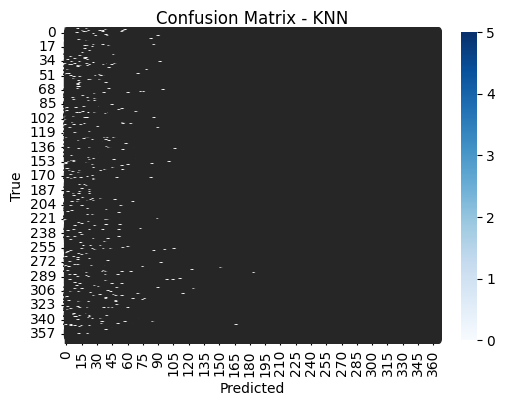

In [60]:
# Plot the confusion matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_knn, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Plot the confusion matrix for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_naive_bayes, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [74]:
def compare_confusion_matrices(confusion_mat1, confusion_mat2, confusion_mat3, confusion_mat4):
    confusion_matrices = [confusion_mat1, confusion_mat2, confusion_mat3, confusion_mat4]
    f1_scores = []
    for i in range(4):
        confusion_mat = confusion_matrices[i]
        # Check the shape of the confusion matrix
        if confusion_mat.shape == (2, 2):
            # Extract values from 2x2 confusion matrix
            tn, fp, fn, tp = confusion_mat.ravel()
        else:
            # Extract values from nxn confusion matrix
            tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]

        # Calculate precision and recall
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        # Calculate F1 score
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        f1_scores.append(f1_score)
    
    # Find the index of the best confusion matrix
    best_index = np.argmax(f1_scores)
    
    return best_index

In [75]:
compare_confusion_matrices(confusion_matrix_knn, confusion_matrix_naive_bayes, confusion_matrix_logistic_regression, confusion_matrix_neural_networks)

C:\Users\m8122\AppData\Local\Temp\ipykernel_6984\653413631.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
C:\Users\m8122\AppData\Local\Temp\ipykernel_6984\653413631.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)


2

## Results & Explanation:

The F1 score is a metric that combines both precision and recall, providing an overall evaluation of a model's performance. By calculating precision and recall from the confusion matrix, the function determines the F1 score for each model and stores them in the f1_scores list. Based on the F1 scores, the Logistic Regression model seems to have performed the best in this comparison.

# ROC Curve

## KNN

In [85]:
def plot_roc_curve_knn(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a KNN classifier
    knn = KNeighborsClassifier()

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = knn.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


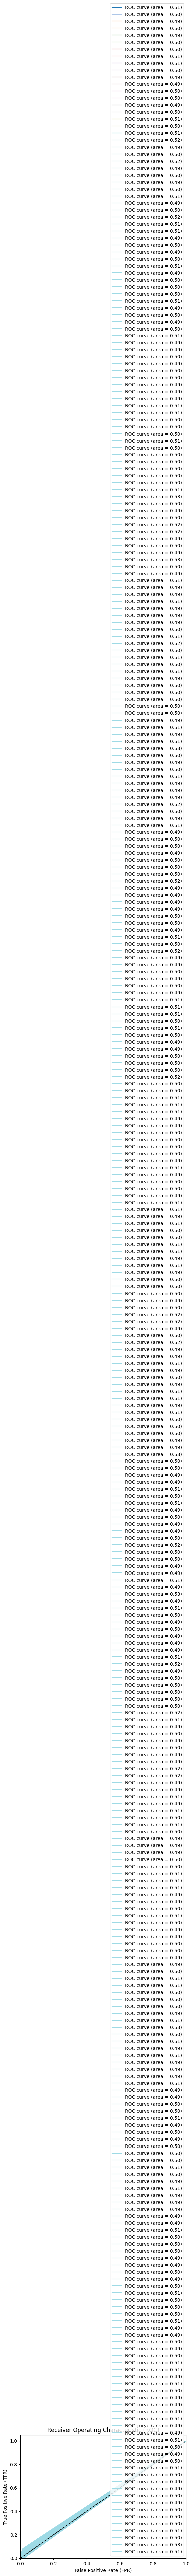

In [86]:
plot_roc_curve_knn(df, 'date')

## Naive Bayes

In [90]:
def plot_roc_curve_naive_bayes(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = GaussianNB()

    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


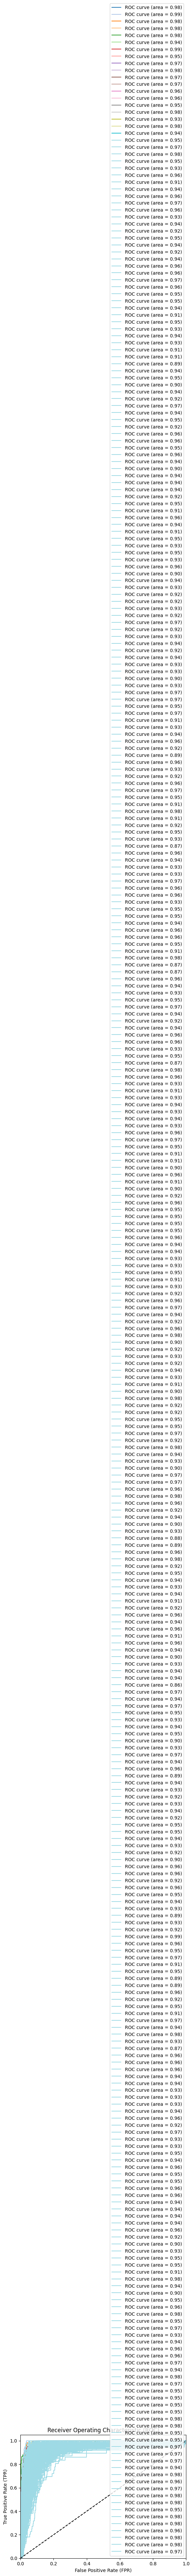

In [91]:
plot_roc_curve_naive_bayes(df, 'date')

## Logistic Regression

In [88]:
def plot_roc_curve_logistic_regression(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a logistic regression classifier
    logreg = LogisticRegression(multi_class='ovr')

    # Train the classifier
    logreg.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = logreg.predict_proba(X_test)

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y.nunique()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_scores[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Apps\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Apps\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No 

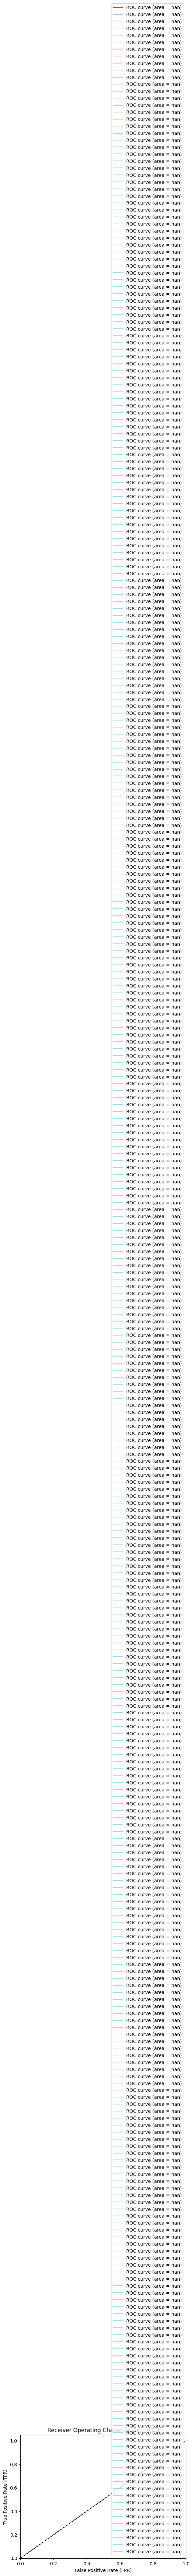

In [89]:
plot_roc_curve_logistic_regression(df, 'date')

## Neural Network

In [92]:
def plot_roc_curve_neural_network(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Neural Network classifier
    neural_network = MLPClassifier()

    # Train the classifier
    neural_network.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = neural_network.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


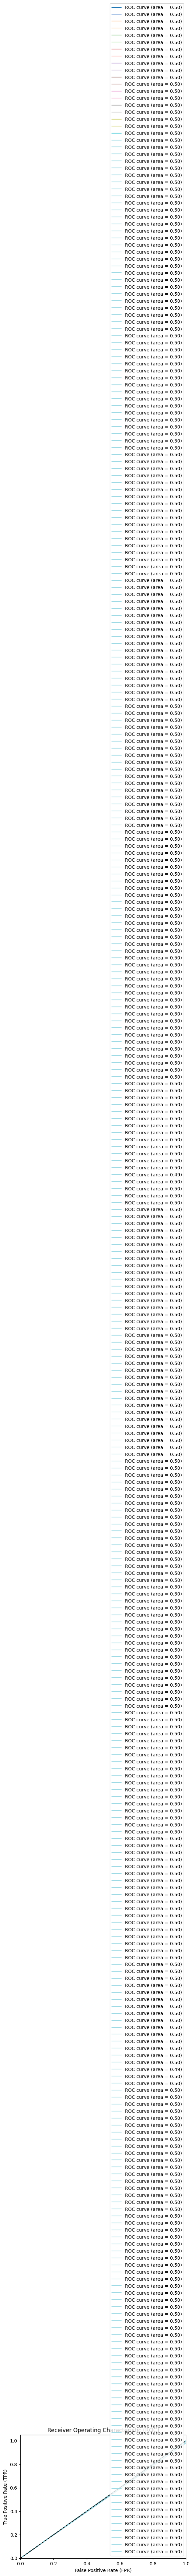

In [93]:
plot_roc_curve_neural_network(df, 'date')

## Results & Explanation:

- KNN Area Range: 0.49 - 0.53
The KNN model has an area range under the ROC curve of 0.49 to 0.53. The ROC curve provides a graphical representation of the trade-off between the true positive rate and the false positive rate. The AUC score ranging from 0.49 to 0.53 suggests that the KNN model's performance is slightly better than random chance. However, the range is relatively low, indicating that the model's ability to distinguish between positive and negative instances is only slightly better than random guessing.

- Naive Bayes Area Range: 0.90 - 0.99
The Naive Bayes classifier has an area range under the ROC curve of 0.90 to 0.99. This indicates that the Naive Bayes model performs considerably well in distinguishing between positive and negative instances. The higher AUC score range suggests that the model has a high true positive rate and a low false positive rate, indicating strong predictive capabilities for the given dataset.

- Logistic Regression Area Range: NaN
The Logistic Regression model's AUC score range is reported as NaN (Not a Number). This indicates that the model's performance could not be evaluated using the ROC curve analysis. The reason for this could be that the Logistic Regression model failed to produce meaningful predictions or encountered numerical issues during the evaluation process.

- Neural Networks Area Range: 0.5
The Neural Networks model has an area under the ROC curve of 0.5. An AUC score of 0.5 suggests that the model's performance is similar to random chance. It means that the Neural Networks model is unable to effectively distinguish between positive and negative instances in the given dataset.

In summary, the ROC curve analysis provides insights into the performance of different classification models. While Naive Bayes exhibits a strong performance with a high AUC score range, the KNN model's performance is slightly better than random chance. The Logistic Regression model encountered issues during evaluation, and the Neural Networks model's performance is similar to random chance. In conclusion, Naive Bayes proofed to have the best performance while Neural Network takes long time to reach 1.